In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from skimage import io as skio
import os
from utils import rotation
from sklearn.linear_model import LinearRegression

In [2]:
def view_image(im, figsize=(10, 10)):
    fig = plt.figure(figsize=figsize)
    plt.imshow(im, 'Greys_r')
    plt.axis('off')
    plt.show()

In [3]:
image = PIL.Image.open("data/image1.tif").convert('L') # convert to greyscale
square = image.crop((144, 244, 656, 756))
square.size

(512, 512)

In [4]:
im = np.array(square)

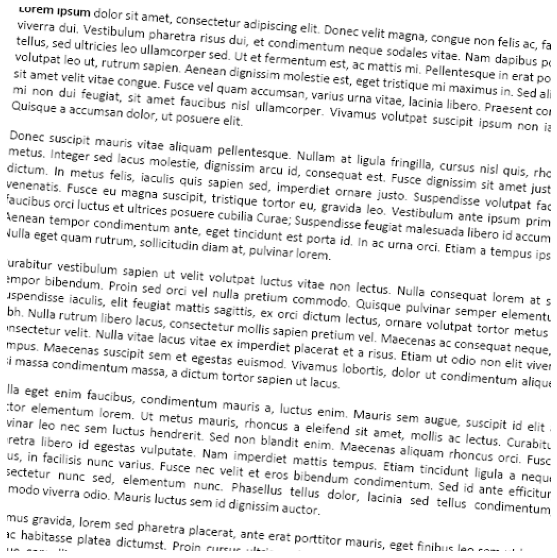

In [5]:
view_image(im)

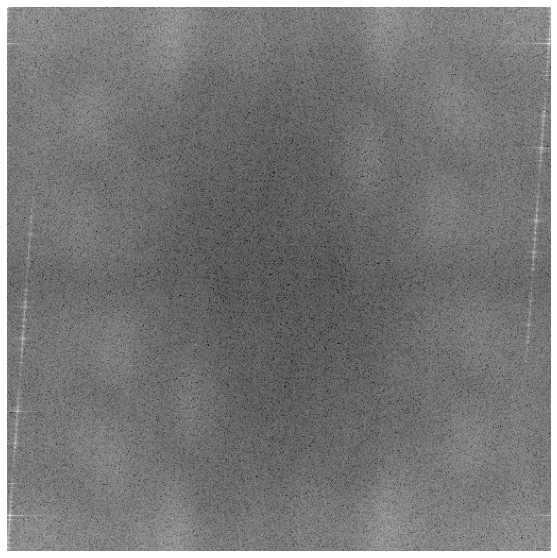

In [6]:
IM = np.fft.fft2(im)
view_image(np.log(np.abs(IM)))

In [7]:
N, M = im.shape
im[:N//2, :M//2].shape

(256, 256)

In [8]:
def quadrants(im):
    N, M = im.shape
    yield im[:N//2, :M//2]
    yield im[:N//2, M//2:]
    yield im[N//2:, :M//2]
    yield im[N//2:, M//2:]
    
def middle_square(shape, n, m=None):
    """
    creates a matrix of ones excepts for a rectangle of size 2n * 2m in the middle overlapping equally each quadrant
    
    :parameters:
    n int: height of the rectangle. If m is not used, n is also the width 
    m int (optional): width of the rectangle
    """
    if not m:
        m = n
    N, M = shape
    res = np.ones(shape)*255
    res[N//2-n:N//2+n, M//2-m:M//2+m] = 0
    return res

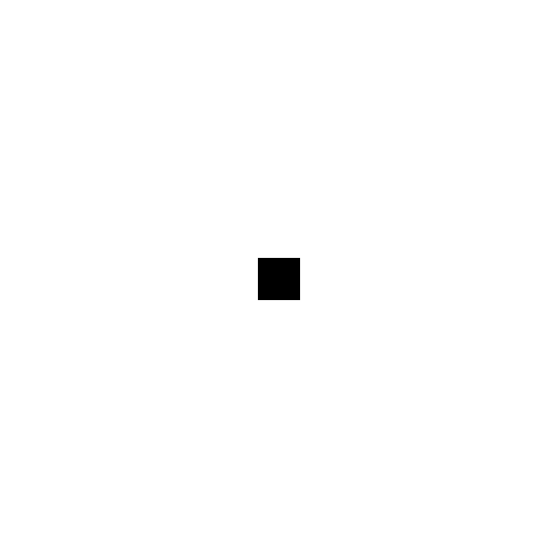

In [9]:
view_image(middle_square(IM.shape, 20))

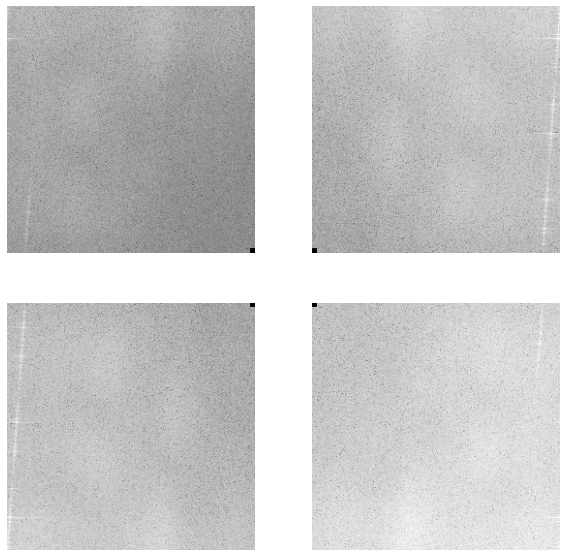

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
for quad, axis in zip(quadrants(np.log(np.abs(IM)+1)*middle_square(IM.shape, 5)), ax):
    axis.imshow(quad, 'Greys_r')
    axis.axis('off')

In [11]:
def find_brightest_pixels(image, N):
    image_1d = image.flatten()
    idx_1d = image_1d.argsort()[-N:]
    x_idx, y_idx = np.unravel_index(idx_1d, image.shape)
    return x_idx, y_idx

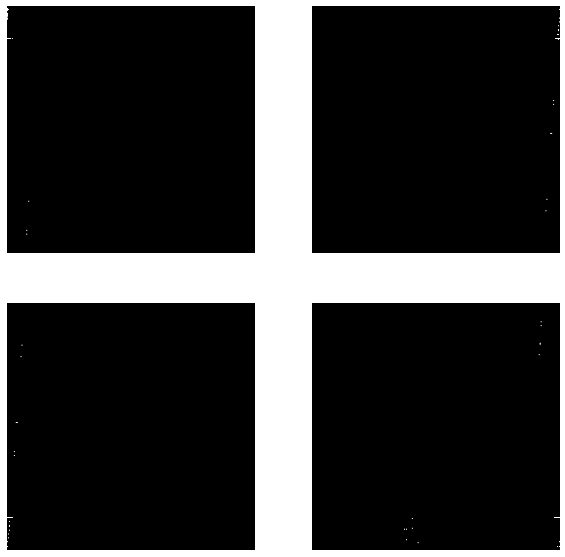

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
for quad, axis in zip(quadrants(np.log(np.abs(IM)+1)*middle_square(IM.shape, 5)), ax):
    test = np.zeros(quad.shape)
    for x, y in zip(*find_brightest_pixels(quad, 20)):
        test[x, y] = 1
    axis.imshow(test, 'Greys_r')
    axis.axis('off')

0.0007163339398613688
0.9542493701675289
0.9653097590291511
0.13364579535491095


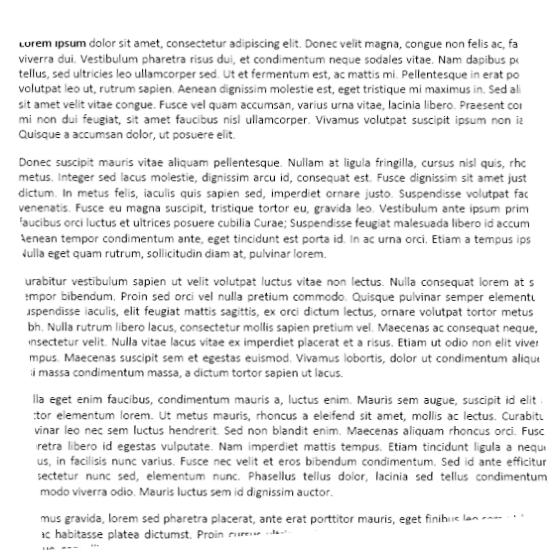

In [13]:
coef = []

for quad in quadrants(np.log(np.abs(IM) + 1)*middle_square(IM.shape, 20)):
    X, y = find_brightest_pixels(quad, 30)
    reg = LinearRegression().fit(X.reshape(-1, 1), y)
    R2 = reg.score(X.reshape(-1, 1), y)
    print(R2)
    if R2>0.9:
        coef.append(reg.coef_)
        
rotated = rotation(im, np.arctan(np.mean(coef)), clip=False)
view_image(rotated)

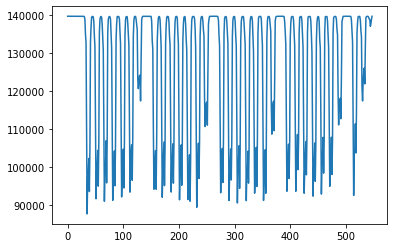

In [14]:
plt.plot(rotated.sum(axis=-1))
plt.show()